"""
Input: Product Name and its Reviews(Generate your own data: 20)
Output: 5 Good Things about the product, 5 Bad Things about the product, What needs to change in the product
"""

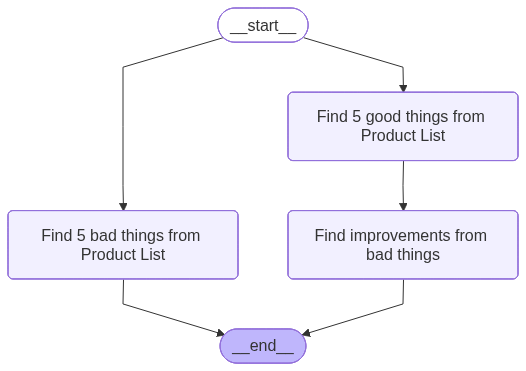

In [4]:
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import dotenv_values
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image,display
config=dotenv_values(".env")

products_with_reviews = [
    {
        "product_name": "Ultra Headphones 101",
        "reviews": [
            "Amazing sound quality and very comfortable.",
            "Battery life could be better, but overall great.",
            "Worth the price for the sound clarity."
        ]
    },
    {
        "product_name": "Pro Smartphone 205",
        "reviews": [
            "Fast and responsive, great display.",
            "Camera quality is top-notch!",
            "A bit expensive but performs really well."
        ]
    },
    {
        "product_name": "Smart Blender 330",
        "reviews": [
            "Blends smoothies perfectly in seconds.",
            "Very easy to clean and quiet.",
            "The lid is a bit loose sometimes."
        ]
    },
    {
        "product_name": "Max Backpack 710",
        "reviews": [
            "Spacious and comfortable to wear.",
            "Zippers feel durable and smooth.",
            "Stylish and great for daily use."
        ]
    },
    {
        "product_name": "Gaming Mouse 501",
        "reviews": [
            "Very responsive with customizable buttons.",
            "Great RGB lighting effects.",
            "A bit too light for my preference."
        ]
    },
    {
        "product_name": "Advance Monitor 27X",
        "reviews": [
            "Crisp visuals and accurate colors.",
            "Perfect for both work and gaming.",
            "Stand could be more adjustable."
        ]
    },
    {
        "product_name": "Lite Keyboard 909",
        "reviews": [
            "Typing feels smooth and satisfying.",
            "Compact and fits well on small desks.",
            "Backlight could be brighter."
        ]
    },
    {
        "product_name": "Elite Tablet 444",
        "reviews": [
            "Great for reading and sketching.",
            "Battery lasts all day.",
            "Not ideal for heavy multitasking."
        ]
    },
    {
        "product_name": "Go Speaker 222",
        "reviews": [
            "Loud and clear sound for its size.",
            "Portable and waterproof!",
            "Bass could be deeper."
        ]
    },
    {
        "product_name": "Smart Camera 808",
        "reviews": [
            "Takes stunning photos in low light.",
            "Easy to use even for beginners.",
            "Wi-Fi connectivity is sometimes spotty."
        ]
    },
    {
        "product_name": "Mini Vacuum 300",
        "reviews": [
            "Perfect for small messes and cars.",
            "Compact and easy to store.",
            "Battery life is short."
        ]
    },
    {
        "product_name": "Max Charger 550",
        "reviews": [
            "Charges devices very quickly.",
            "Compact design, easy to carry.",
            "Gets a little warm during use."
        ]
    },
    {
        "product_name": "Ultra Desk Lamp 123",
        "reviews": [
            "Great lighting with multiple brightness levels.",
            "Sleek and modern look.",
            "Touch controls are a bit sensitive."
        ]
    },
    {
        "product_name": "Pro Webcam 777",
        "reviews": [
            "Clear image even in low light.",
            "Plug and play, very simple to use.",
            "Audio quality isn't the best."
        ]
    },
    {
        "product_name": "Elite Fitness Tracker 202",
        "reviews": [
            "Tracks steps and sleep accurately.",
            "Battery lasts for over a week.",
            "Display can be hard to see in sunlight."
        ]
    },
    {
        "product_name": "Smart Thermos 606",
        "reviews": [
            "Keeps drinks hot for hours.",
            "Digital temperature display is handy.",
            "Feels a bit heavy."
        ]
    },
    {
        "product_name": "Advance Tripod 999",
        "reviews": [
            "Very sturdy even with DSLR.",
            "Adjustable height is great.",
            "Slightly bulky to carry around."
        ]
    },
    {
        "product_name": "Lite Power Bank 321",
        "reviews": [
            "Charges phone 2–3 times fully.",
            "Compact and pocket-friendly.",
            "Slow to recharge itself."
        ]
    },
    {
        "product_name": "Go Fan 888",
        "reviews": [
            "Strong airflow for a mini fan.",
            "Quiet and battery lasts long.",
            "Only works well when close."
        ]
    },
    {
        "product_name": "Mini Projector 412",
        "reviews": [
            "Great picture quality for the price.",
            "Perfect for movie nights.",
            "Built-in speaker is weak, needs external audio."
        ]
    }
]

class AgentState(TypedDict):
    prodlist: list
    good_things: str
    bad_things: str
    improvements: str


def find_good_things(state: AgentState):
    llm=ChatOpenAI(api_key=config["OPEN_AI_API_KEY"], model="gpt-4o-mini", temperature=0.1)
    prompt=f"""Go through the review of the 20 products and tell me 5 Good Things about the product
    This is the product list {state['prodlist']}"""
    good_things=llm.invoke(prompt)
    return good_things.content

def find_bad_things(state: AgentState):
    llm=ChatOpenAI(api_key=config["OPEN_AI_API_KEY"], model="gpt-4o-mini", temperature=0.1)
    prompt=f"""Go through the review of the 20 products and tell me 5 Good Things about the product
    This is the product list {state['prodlist']}"""
    bad_things=llm.invoke(prompt)
    return bad_things.content

def find_improvements(state: AgentState):
    llm=ChatOpenAI(api_key=config["OPEN_AI_API_KEY"], model="gpt-4o-mini", temperature=0.1)
    prompt=f"""Go through the review of the 20 products and tell me what can be improved as per 
    the 5 bad things you listed: {state['bad_things']} from the overall product list {state['prodlist']}"""
    imp=llm.invoke(prompt)
    return imp.content


start_state ={
    "prodlist": products_with_reviews
}

workflow=StateGraph(AgentState)
workflow.add_node("Find 5 good things from Product List",find_good_things)
workflow.add_node("Find 5 bad things from Product List",find_bad_things)
workflow.add_node("Find improvements from bad things",find_improvements)
workflow.add_edge(START, "Find 5 good things from Product List")
workflow.add_edge(START, "Find 5 bad things from Product List")
workflow.add_edge("Find 5 good things from Product List","Find improvements from bad things")
workflow.add_edge("Find improvements from bad things",END)
graph=workflow.compile()

display_graph=graph.get_graph()
mermaid_image_data=display_graph.draw_mermaid_png()
display(Image(mermaid_image_data))